In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
import re

In [40]:
data = pd.read_csv("./pis_mat.csv", header = None, index_col = 0)

In [41]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
0,,,,,,,,,,,,,,,,,,,,,
>Z24758|ICMV_IN_IN_Triv_86_,100.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
>GQ924760|ICMV_Jat_IN_Dharwad_08_,91.201,100.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
>JF496657|ICMV_IN_MH_Jalgaon_09_,90.601,93.801,100.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
>AJ575819|ICMV_Ker_IN_KL_Adivaram_2_02_,91.401,93.501,91.701,100.001,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
>AJ314737|SLCMV_LK_LK_CMB_SLCMVCol_98_,86.401,83.601,82.801,83.301,100.001,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
data.min().min()

68.501

In [4]:
with open("./International-CMVs.fasta", mode = 'r') as fp:
    fasta = fp.read()

In [5]:
pat = re.compile(">[a-zA-Z0-9\\/\\-|:()\\[\\]]+")
finds = re.findall(pattern = pat, string = fasta)

In [44]:
finds

['>HE616777|ACMBFV(BF:Oua:BF127:08)',
 '>J02057|ACMV(KE:West',
 '>HE617299|CMMGV(MG:Tol:06)',
 '>AF112354|EACMCMV(CMRN:WACMV/CM:98)',
 '>AJ717572|EACMKV(KE:EACMKV-[K298]:02)',
 '>AJ006460|EACMMV(MW:MK:96)',
 '>AJ717542|EACMV/KE2(KE:EACMV-KE2[K48]:01)',
 '>JX473582|EACMV/MW(MW:Malawi/2007/8N:07)',
 '>AY795983|EACMV/TZ(TZ:TZ1:01)',
 '>AF126806|EACMV/UG(UG:EACMV/Ug2//Svr:97)',
 '>AF422174|EACMZV(TZ:ZNZ:Uguja:98)',
 '>Z24758|ICMV/IN(IN:Triv:86)',
 '>GQ924760|ICMV/Jat(IN:Dharwad:08)',
 '>AJ575819|ICMV/Ker(IN:KL:Adivaram',
 '>JF496657|ICMV(IN:MH:Jalgaon:09)',
 '>AF155806|SACMV(ZA:01)',
 '>AJ579307|SLCMV/IN(IN:KL:Adivaram:03)',
 '>OK377342|SLCMV(LK:Tri:Kinn2021:21)',
 '>OK377343|SLCMV(LK:Tri:Kuc2021:21)',
 '>OK424595|SLCMV(LK:Tri:Mut2021:21)',
 '>OK377341|SLCMV(LK:Tri:Nil2021:21)',
 '>OK362288|SLCMV(LK:Tri:Pd2021:21)',
 '>AJ314737|SLCMV/LK(LK:CMB:SLCMV-Col:98)']

In [45]:
names = data.index.str.replace('>', '').str.rstrip('_')

In [46]:
data.columns = data.index = names

In [47]:
data.tail()

,Z24758|ICMV_IN_IN_Triv_86,GQ924760|ICMV_Jat_IN_Dharwad_08,JF496657|ICMV_IN_MH_Jalgaon_09,AJ575819|ICMV_Ker_IN_KL_Adivaram_2_02,AJ314737|SLCMV_LK_LK_CMB_SLCMVCol_98,AJ579307|SLCMV_IN_IN_KL_Adivaram_03,OK377343|SLCMV_LK_Tri_Kuc2021_21,OK377341|SLCMV_LK_Tri_Nil2021_21,OK377342|SLCMV_LK_Tri_Kinn2021_21,OK362288|SLCMV_LK_Tri_Pd2021_21,...,HE617299|CMMGV_MG_Tol_06,AF112354|EACMCMV_CMRN_WACMV_CM_98,JX473582|EACMV_MW_MW_Malawi_2007_8N_07,AY795983|EACMV_TZ_TZ_TZ1_01,AJ717542|EACMV_KE2_KE_EACMVKE2[K48]_01,AF126806|EACMV_UG_UG_EACMV_Ug2__Svr_97,AJ006460|EACMMV_MW_MK_96,AJ717572|EACMKV_KE_EACMKV[K298]_02,AF422174|EACMZV_TZ_ZNZ_Uguja_98,AF155806|SACMV_ZA_01
0,,,,,,,,,,,,,,,,,,,,,
AF126806|EACMV_UG_UG_EACMV_Ug2__Svr_97,71.601,70.501,70.701,70.301,71.401,70.201,70.201,70.301,70.001,70.201,...,75.001,84.601,85.601,86.401,91.601,100.001,NaN,NaN,NaN,NaN
AJ006460|EACMMV_MW_MK_96,71.601,71.001,71.101,70.101,71.201,70.701,70.701,70.801,70.401,70.601,...,78.401,80.201,80.401,80.801,87.001,87.401,100.001,NaN,NaN,NaN
AJ717572|EACMKV_KE_EACMKV[K298]_02,73.101,72.801,73.201,72.901,73.601,73.001,72.601,72.601,72.601,72.801,...,77.301,79.501,79.601,80.201,89.001,85.101,80.901,100.001,NaN,NaN
AF422174|EACMZV_TZ_ZNZ_Uguja_98,72.701,72.701,72.901,72.501,73.601,73.001,72.801,73.001,72.701,72.901,...,82.901,79.301,80.701,80.701,88.501,84.501,80.901,90.701,100.001,NaN
AF155806|SACMV_ZA_01,73.501,73.501,73.201,73.001,73.201,73.101,72.801,72.701,72.601,72.801,...,81.901,73.201,72.501,73.401,81.801,80.401,86.001,87.801,82.501,100.001


In [48]:
data.shape

(23, 23)

In [49]:
data.min()

0
Z24758|ICMV_IN_IN_Triv_86                  70.001
GQ924760|ICMV_Jat_IN_Dharwad_08            68.501
JF496657|ICMV_IN_MH_Jalgaon_09             69.201
AJ575819|ICMV_Ker_IN_KL_Adivaram_2_02      69.001
AJ314737|SLCMV_LK_LK_CMB_SLCMVCol_98       70.101
AJ579307|SLCMV_IN_IN_KL_Adivaram_03        69.301
OK377343|SLCMV_LK_Tri_Kuc2021_21           69.101
OK377341|SLCMV_LK_Tri_Nil2021_21           69.301
OK377342|SLCMV_LK_Tri_Kinn2021_21          68.901
OK362288|SLCMV_LK_Tri_Pd2021_21            69.201
OK424595|SLCMV_LK_Tri_Mut2021_21           68.901
HE616777|ACMBFV_BF_Oua_BF127_08            71.501
J02057|ACMV_KE_West_Kenyan_844_98          70.501
HE617299|CMMGV_MG_Tol_06                   72.501
AF112354|EACMCMV_CMRN_WACMV_CM_98          73.201
JX473582|EACMV_MW_MW_Malawi_2007_8N_07     72.501
AY795983|EACMV_TZ_TZ_TZ1_01                73.401
AJ717542|EACMV_KE2_KE_EACMVKE2[K48]_01     81.801
AF126806|EACMV_UG_UG_EACMV_Ug2__Svr_97     80.401
AJ006460|EACMMV_MW_MK_96                   80.90

In [50]:
# data.isna().sum()
data = data.replace(to_replace = np.nan, value = 0)

In [51]:
# the default colourmap in SDT is :: RGB
# every value less than 70 gets mapped to colour 0 0 143
# others :: 70 - 100
# (0, 0, 191)
# (0, 0, 239)
# (0, 32, 255)
# (0, 80, 255)
# (0, 128, 255)
# (0, 175, 255)
# (0, 223, 255)
# (16, 255, 239)
# (64, 255, 191)
# (111, 255, 143)
# (159, 255, 96)
# (207, 255, 48)
# (255, 255, 0)
# (255, 207, 0)
# (255, 159, 0)
# (255, 111, 0)
# (255, 64, 0)
# (255, 16, 0)
# (223, 0, 0)
# (175, 0, 0 )
# (128, 0, 0)

In [52]:
# these colours are to be mapped for values 70 to 100

RGB_70_100 = np.array([(0, 0, 191), (0, 0, 239), (0, 32, 255), (0, 80, 255), (0, 128, 255), (0, 175, 255), (0, 223, 255), (16, 255, 239),
                       (64, 255, 191), (111, 255, 143), (159, 255, 96), (207, 255, 48), (255, 255, 0), (255, 207, 0), (255, 159, 0),
                       (255, 111, 0), (255, 64, 0), (255, 16, 0), (223, 0, 0), (175, 0, 0 ), (128, 0, 0)])

In [53]:
RGB_70_100.shape

(21, 3)

In [54]:
np.linspace(start = 70, stop = 100, num = 21), np.linspace(start = 70, stop = 100, num = 21).size

(array([ 70. ,  71.5,  73. ,  74.5,  76. ,  77.5,  79. ,  80.5,  82. ,
         83.5,  85. ,  86.5,  88. ,  89.5,  91. ,  92.5,  94. ,  95.5,
         97. ,  98.5, 100. ]),
 21)

In [55]:
# between 70 - 100 (a bracket 30 units wide) we have 21 colours
# for 0 - 70 ??

(21 / 30) * 70

49.0

In [56]:
# we need an additional alpha channel value in addition to RGB
# and the colour values should be within the range of 0 and 1

colors = np.concatenate([np.tile((0, 0, 143), reps = 49).reshape(49, 3), RGB_70_100])
colors = np.array([(r, g, b, 255) for (r, g, b) in colors], dtype = np.float32) / 255  # division by 255 to normalize the values between 0 and 1

In [57]:
# we want NaNs te be mapped to white, so

colors[0][0] = colors[0][1] = colors[0][2] = 1.000
colors[:4]

array([[1.        , 1.        , 1.        , 1.        ],
       [0.        , 0.        , 0.56078434, 1.        ],
       [0.        , 0.        , 0.56078434, 1.        ],
       [0.        , 0.        , 0.56078434, 1.        ]], dtype=float32)

In [58]:
colormap = ListedColormap(colors = colors)

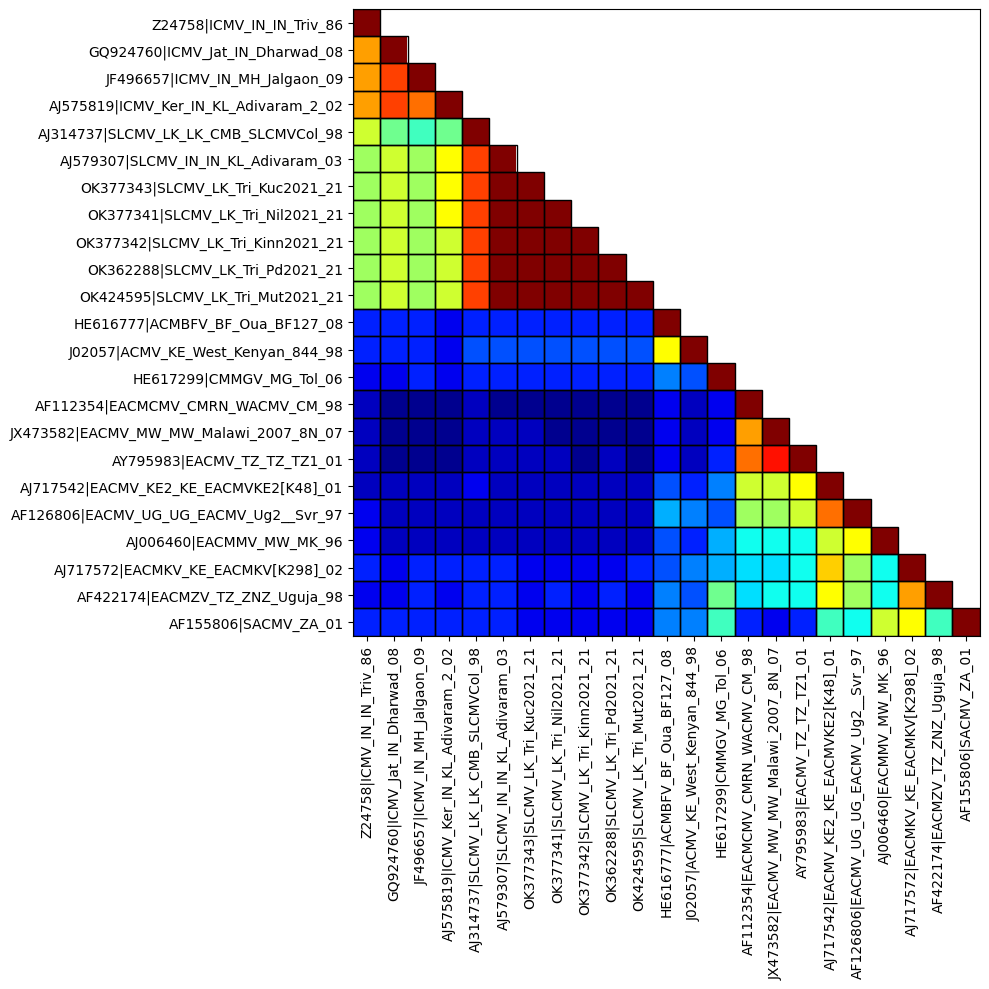

In [63]:
# norm = plt.Normalize(0, 100)
fig, axes = plt.subplots()
fig.set_size_inches(10, 10)

ticks = np.linspace(start = 0, stop = 22, num = 23)

axes.set_xticks(ticks = ticks, labels = names, rotation=90)
axes.set_yticks(ticks = ticks, labels = names)
axes.imshow(data, cmap = colormap)
# axes.grid(which = "minor", color = "black", linestyle = '-', linewidth = 2)

# fig.colorbar(ScalarMappable(norm = None, cmap = colormap), ax = axes)

xsize = 1
for y in ticks:
    for x in range(xsize):
        axes.add_patch(plt.Rectangle((x - .51, y - .5), 1, 1, edgecolor = "black", facecolor = "none"))
    xsize += 1

plt.tight_layout()
plt.show()
# plt.savefig("./SDT.jpeg", format = "jpeg", dpi = 350)

In [188]:
x = np.array([np.arange(start = 100, stop = 67, step = -1.5)])

c = np.array([(0, 0, 143), (0, 0, 191), (0, 0, 239), (0, 32, 255), (0, 80, 255), (0, 128, 255), (0, 175, 255), (0, 223, 255), (16, 255, 239),
                       (64, 255, 191), (111, 255, 143), (159, 255, 96), (207, 255, 48), (255, 255, 0), (255, 207, 0), (255, 159, 0),
                       (255, 111, 0), (255, 64, 0), (255, 16, 0), (223, 0, 0), (175, 0, 0 ), (128, 0, 0)])

colors = np.array([(r, g, b, 255) for (r, g, b) in c]) / 255

In [189]:
colors.shape

(22, 4)

In [190]:
x

array([[100. ,  98.5,  97. ,  95.5,  94. ,  92.5,  91. ,  89.5,  88. ,
         86.5,  85. ,  83.5,  82. ,  80.5,  79. ,  77.5,  76. ,  74.5,
         73. ,  71.5,  70. ,  68.5]])

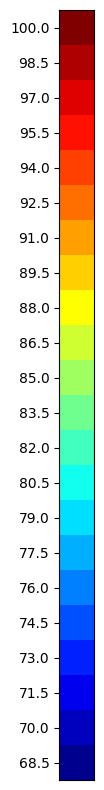

In [172]:
fig, axes = plt.subplots()
fig.set_size_inches(1, 10)

axes.imshow(x.T, cmap = ListedColormap(colors))
ylim_min, ylim_max = axes.get_ylim()
axes.set_xticks([])
# we need 22 ticks for each colour
axes.set_yticks(ticks = np.linspace(start = ylim_min - .5, stop = ylim_max + .5, num = 22), labels =  np.linspace(start = 68.5, stop = 100, num = 22)) 

plt.show()

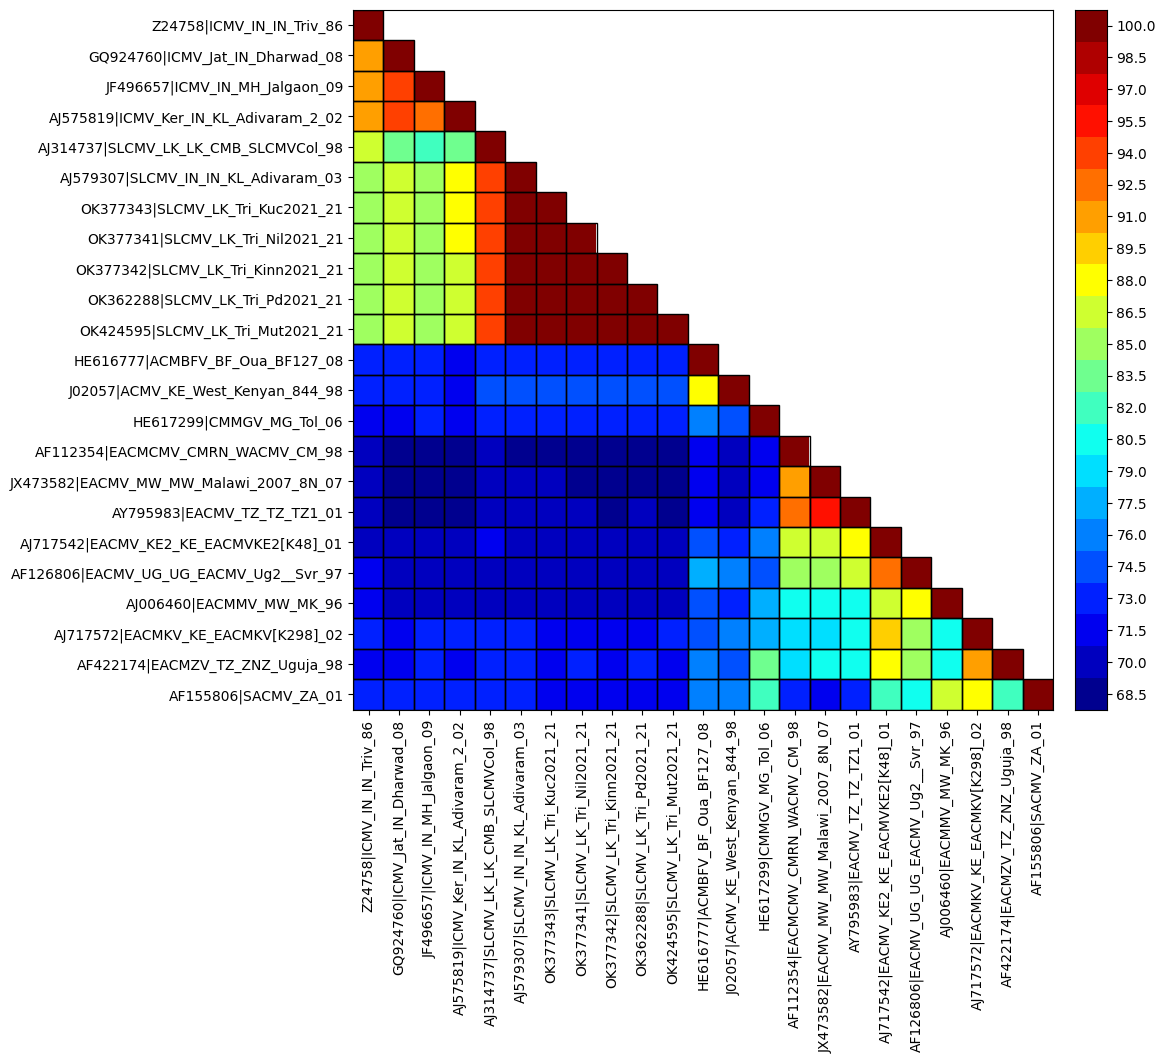

In [228]:
fig = plt.figure(figsize = (10, 10))
gspec_im, gspec_cb = plt.GridSpec(nrows = 1, ncols = 2, width_ratios = (10, .8), figure = fig, wspace = 0, top = 0.75, bottom = .05)
axes_im, axes_cb = fig.add_subplot(gspec_im), fig.add_subplot(gspec_cb)

ticks = np.linspace(start = 0, stop = 22, num = 23)

axes_im.set_xticks(ticks = ticks, labels = names, rotation=90)
axes_im.set_yticks(ticks = ticks, labels = names)
axes_im.imshow(data, cmap = colormap)
xsize = 1
for y in ticks:
    for _x in range(xsize):
        axes_im.add_patch(plt.Rectangle((_x - .51, y - .5), 1, 1, edgecolor = "black", facecolor = "none"))
    xsize += 1

axes_cb.imshow(x.T, cmap = ListedColormap(colors))
ylim_min, ylim_max = axes_cb.get_ylim()
axes_cb.set_xticks([])
axes_cb.set_yticks(ticks = np.linspace(start = ylim_min - .5, stop = ylim_max + .5, num = 22), 
                   labels = np.linspace(start = 68.5, stop = 100, num = 22)) 
axes_cb.yaxis.tick_right()
# plt.tight_layout()
# plt.show()
plt.savefig("./SDT.jpeg", format = "jpeg", dpi = 450, bbox_inches = "tight")